# Sentiment Analyisis On Trumps Tweets
<p>The objectives of this project are:
<ol>
    <li>Extract twitter data using tweepy and pandas</li>
    <li>Statistics and visualizations with numpy, matplotlib and seaborn</li>
    <li>Sentimental analysis on tweets using textblob</li>
</ol>
</p>

<h3>Requirements</h3>
<ul>
    <li>Python3.6/2.7</li>
    <li>numpy</li>
    <li>pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Textblob</li>
</ul>

In [3]:
import matplotlib.pyplot as plt      #plotting
import numpy as np                    # number computation
import pandas as pd                   # Data Handling
import seaborn as sns                 #data visualization library based on matplotlib
import tweepy                         #twitter's API
import twitter_credentials            # this is a file that includes twitter creds
from IPython.display import display


#print the graphs in the browser window
%matplotlib inline 

In [4]:
def twitter_setup():
    auth = tweepy.OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
    auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth)
    return api

<h3>Tweet extraction</h3>

In [5]:
# call the function we had created
extractor = twitter_setup()

# using the api we make a list of the latest 200 tweets py realDonaldTrump
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count = 200)

print("Tweets Extracted: {}.\n".format(len(tweets)))

Tweets Extracted: 200.



<p>As expected we have extracted 200 tweets.<br/>
api.user_timeline() takes a couple of arguments in our case we specified the screen_name of the user we wanted if we hadn't it would have used our own username by default. We set the number of tweets to 200. by default the rate is lower than 200.<br/>
</p>
<p>We can print the first 10 tweets.</p>

In [6]:
# we can print the first 10 tweets
print("recent 10 tweeets")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

recent 10 tweeets
Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall.… https://t.co/iDNjDIKyNz

“Mainstream Media tries to rewrite history to credit Obama for Trump accomplishments. Since President Trump took of… https://t.co/nyT88ohhGh

Fantastic numbers on consumer spending released on Friday. Stock Market hits all time high!

...And it will get, as I have always said, much better from even here! https://t.co/El26RzBjpG

RT @realDonaldTrump: Social Media Giants are silencing millions of people. Can’t do this even if it means we must continue to hear Fake New…

RT @realDonaldTrump: Big story out that the FBI ignored tens of thousands of Crooked Hillary Emails, many of which are REALLY BAD. Also gav…

RT @realDonaldTrump: ....FISA abuse, Christopher Steele &amp; his phony and corrupt Dossier, the Clinton Foundation, illegal surveillance of Tr…

RT @realDonaldTrump: “Department of Justice will not be improperly influenced b

<h3>Creating a Dataframe</h3>
Using a dataframe will enable us to easily manipulate data extracted.

In [7]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

#To display the first 10 tweets
display(data.head(10))




,Tweets,len,ID,Date,Source,Likes,RTs
0,Over 90% approval rating for your all time fav...,140,1033876658439245825,2018-08-27 00:39:38,Twitter for iPhone,90797,23346
1,“Mainstream Media tries to rewrite history to ...,140,1033836873473568768,2018-08-26 22:01:33,Twitter for iPhone,70507,19802
2,Fantastic numbers on consumer spending release...,91,1033723516116500481,2018-08-26 14:31:06,Twitter for iPhone,84166,18419
3,"...And it will get, as I have always said, muc...",94,1033722550881329152,2018-08-26 14:27:16,Twitter for iPhone,60945,14542
4,RT @realDonaldTrump: Social Media Giants are s...,140,1033722177156247552,2018-08-26 14:25:47,Twitter for iPhone,0,49711
5,RT @realDonaldTrump: Big story out that the FB...,140,1033721802000936960,2018-08-26 14:24:17,Twitter for iPhone,0,39350
6,"RT @realDonaldTrump: ....FISA abuse, Christoph...",144,1033706057330241537,2018-08-26 13:21:44,Twitter for iPhone,0,28400
7,RT @realDonaldTrump: “Department of Justice wi...,140,1033706045988892672,2018-08-26 13:21:41,Twitter for iPhone,0,31074
8,My deepest sympathies and respect go out to th...,115,1033515425336885248,2018-08-26 00:44:13,Twitter for iPhone,203945,37434
9,Stock Market hit all time high on Friday. Cong...,65,1033500723709992960,2018-08-25 23:45:48,Twitter for iPhone,126396,25983


## Visualization and statistics
<p>we can be able to get the mean length and most popular tweets. </p>

In [8]:
# mean

mean = np.mean(data['len'])
print("the mean length of the tweets is: {}".format(mean))

the mean length of the tweets is: 121.7


In [11]:
# extract tweets with  the most number of likes
favourite_max = np.max(data['Likes'])

favourite = data[data.Likes == favourite_max].index[0]

# max likes
print("Tweet with most number of likes is: \n{}".format(data['Tweets'][favourite]))
print("NUmber of likes: {}".format(favourite_max))
print("{} characters.\n".format(data['len'][favourite]))

Tweet with most number of likes is: 
My deepest sympathies and respect go out to the family of Senator John McCain. Our hearts and prayers are with you!
NUmber of likes: 203945
115 characters.



In [14]:
# Extract tweet with most number of retweets

retweet_max = np.max(data['RTs'])
retweets = data[data.RTs == retweet_max].index[0]

# max retweets
print("Tweet with most retweets is: \n{}".format(data['Tweets'][retweets]))
print("Number of retweets: {}".format(retweet_max))
print("{} characters.\n".format(data['len'][retweets]))

Tweet with most retweets is: 
RT @realDonaldTrump: Social Media Giants are silencing millions of people. Can’t do this even if it means we must continue to hear Fake New…
Number of retweets: 49711
140 characters.



<h3>Time series of the data</h3>

In [15]:
tweet_length = pd.Series(data=data['len'].values, index=data['Date'])
tweet_favourite = pd.Series(data=data['Likes'].values, index=data['Date'])
tweet_retweet = pd.Series(data=data['RTs'].values, index=data['Date'])

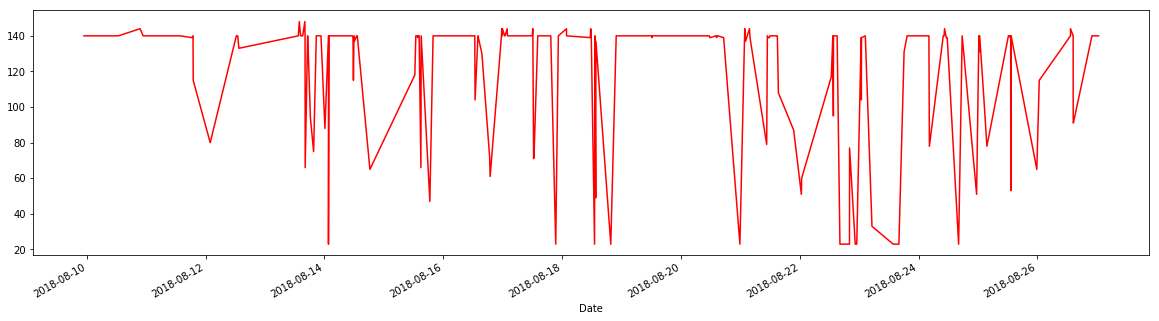

In [22]:
# plot of the length of tweets vs period of time
tweet_length.plot(figsize=(20,5),color='r')

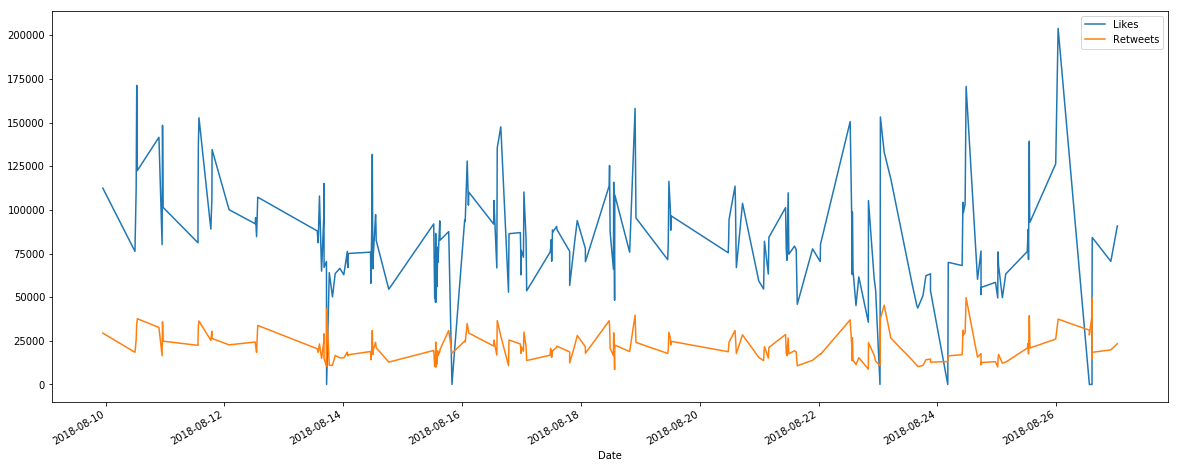

In [24]:
# likes and retweeets
tweet_favourite.plot(figsize=(20,8), label="Likes", legend=True)
tweet_retweet.plot(figsize=(20,8), label="Retweets", legend=True )

<p>We can see theat the more likes the more retweets. </p>
<p>It would be interesting to find out the sources from which the tweets come from. There is a high chance that if the tweets come from various sources there is more than one person tweeting the content or the user has more than one device.</p>

In [26]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
        
#print the sources
print("Content sources: ")
for source in sources:
    print("* {}".format(source))

Content sources: 
* Twitter for iPhone
* Media Studio
* Twitter for iPad


<p>We can make a pie chart to visualize which source is most used</p>

In [ ]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100
